In [1]:
# load the packages needed
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from src.solver import Solver
from src.model import AR, MA
import src.data_processor as dp
import src.inference as inf
from src.ts_gen import ar1_gen
import src.trading as tr
data = np.loadtxt("../data/GOOG.csv", delimiter=',')

In [2]:
X = np.array([data[0:100]])
Y = dp.get_return(X)

In [3]:
lag = 5
sigma = 1.0
intercept = 0.1
phi = np.array([[ 0.04560256],
        [ 0.0535601 ],
        [-0.78190871],
        [ 1.30062633],
        [ 0.46616754]])
AR_model = AR(lag=lag, phi=phi, sigma=sigma, intercept=intercept)
AR_model.params

{'intercept': 0.1, 'phi': array([[ 0.04560256],
        [ 0.0535601 ],
        [-0.78190871],
        [ 1.30062633],
        [ 0.46616754]]), 'sigma': 1.0}

In [4]:
_, grads = AR_model.loss(Y)
solver = Solver(AR_model, Y,
                          update_rule='sgd_momentum',
                          optim_config={
                            'learning_rate': 1e-6,
                          },
                          
                          num_epochs=10000, batch_size=1,
                          print_every=10)
solver.train()

10000
the loss is 86.566144
the loss is 85.883621
the loss is 85.059396
the loss is 84.174521
the loss is 83.256735
the loss is 82.315231
the loss is 81.352711
the loss is 80.369586
the loss is 79.365436
the loss is 78.339511
the loss is 77.290909
the loss is 76.218632
the loss is 75.121597
the loss is 73.998645
the loss is 72.848528
the loss is 71.669908
the loss is 70.461345
the loss is 69.221287
the loss is 67.948060
the loss is 66.639851
the loss is 65.294697
the loss is 63.910465
the loss is 62.484833
the loss is 61.015266
the loss is 59.498990
the loss is 57.932961
the loss is 56.313829
the loss is 54.637897
the loss is 52.901068
the loss is 51.098788
the loss is 49.225977
the loss is 47.276941
the loss is 45.245272
the loss is 43.123726
the loss is 40.904067
the loss is 38.576880
the loss is 36.131338
the loss is 33.554905
the loss is 30.832954
the loss is 27.948286
the loss is 24.880485
the loss is 21.605075
the loss is 18.092364
the loss is 14.305873
the loss is 10.200102
the 

In [5]:
AR_model.params

{'intercept': array([ 0.00019801]), 'phi': array([[ 0.04563594],
        [ 0.05349392],
        [-0.78162069],
        [ 1.29967032],
        [ 0.46572242]]), 'sigma': array([ 0.01330691])}

In [6]:
l=100
nstep=20
window=5
money=100

profit, signal, pred_price = tr.rolltrade(np.array([data]),AR_model,l,nstep,window,money)

signal

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  1.,  0., -1.,  0.,  1.,
         0.,  0., -1.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

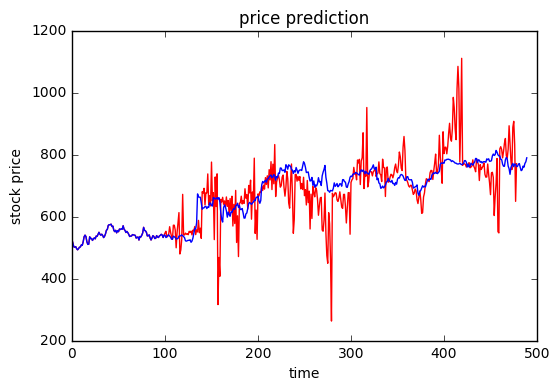

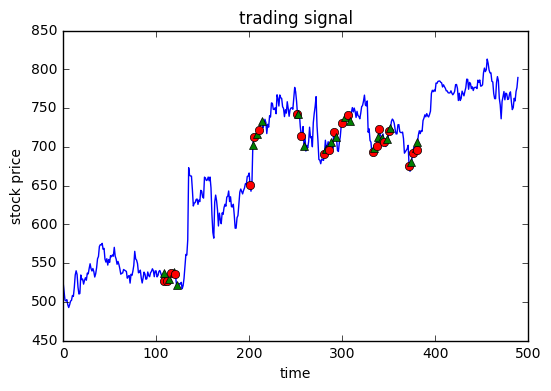

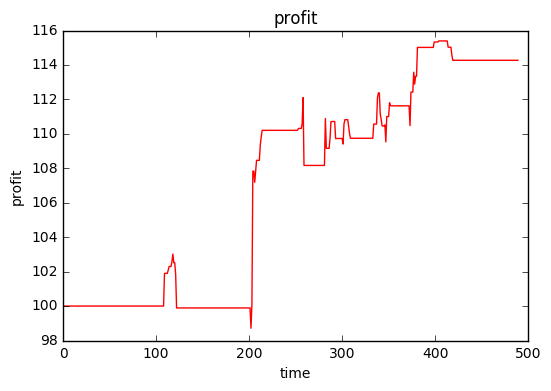

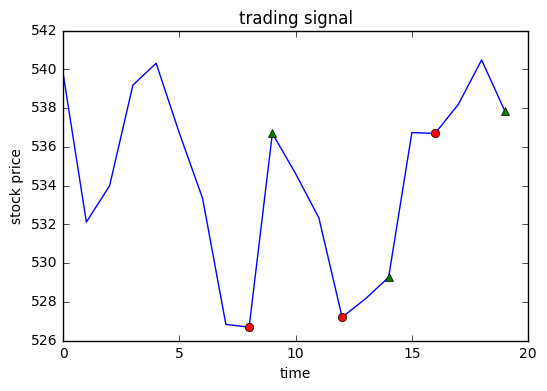

114.269821449


In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pred_price[0,0:data.shape[0]-11],'r')
plt.plot(data,'b')
plt.hold(True)     
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('price prediction')
plt.show() 




        
plt.figure()
plt.plot(data[0:],'b')
for i in range(data.shape[0]-l):
    if signal[0,i]==1:
        plt.plot(i,data[i],'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show()




plt.figure()
plt.plot(profit[0,:],'r')
plt.xlabel('time')
plt.ylabel('profit')
plt.title('profit')
plt.show()


"""plt.figure()
plt.plot(data[l:],'b')
for i in range(data.shape[0]-l):
    if signal[0,l+i]==1:
        plt.plot(i,data[l+i],'ro')
    if signal[0,l+i]==-1:
        plt.plot(i,data[l+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')"""

        
        
plt.figure()
plt.plot(data[l:l+20],'b')
for i in range(20):
    if signal[0,100+i]==1:
        plt.plot(i,data[100+i],'ro')
    if signal[0,100+i]==-1:
        plt.plot(i,data[100+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show()


print profit[0,-1]

In [8]:
phi_y, sigma_y = inf.yule_walker(Y, order =5, method='unbiased')
AR_model_y = AR(lag=5, phi=phi_y, sigma=sigma_y, intercept=0)


l=100
nstep=20
window=5
money=100

profit, signal, pred_price = tr.rolltrade(np.array([data]),AR_model_y,l,nstep,window,money)

signal

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1., -1.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1., -1.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  1.,
        -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.

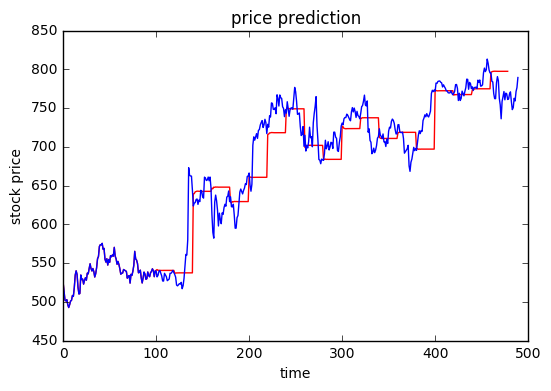

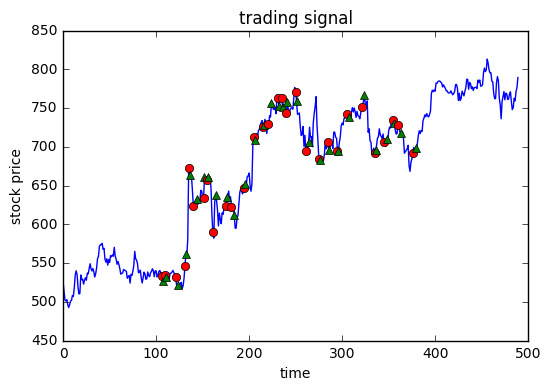

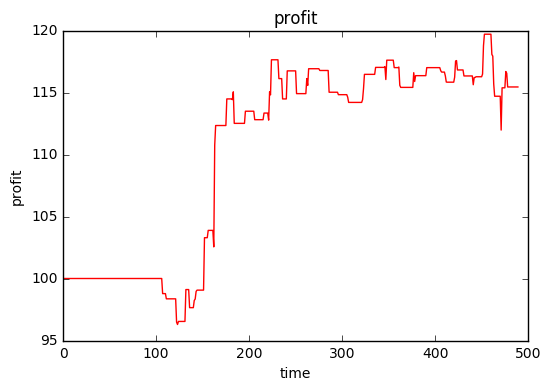

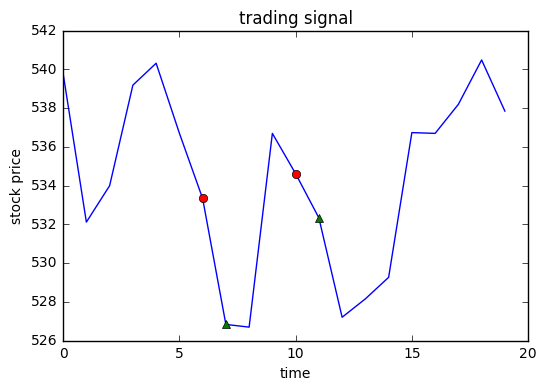

115.446783927


In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pred_price[0,0:data.shape[0]-11],'r')
plt.plot(data,'b')
plt.hold(True)     
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('price prediction')
plt.show() 




        
plt.figure()
plt.plot(data[0:],'b')
for i in range(data.shape[0]-l):
    if signal[0,i]==1:
        plt.plot(i,data[i],'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show() 



plt.figure()
plt.plot(profit[0,:],'r')
plt.xlabel('time')
plt.ylabel('profit')
plt.title('profit')
plt.show() 

"""plt.figure()
plt.plot(data[l:],'b')
for i in range(data.shape[0]-l):
    if signal[0,l+i]==1:
        plt.plot(i,data[l+i],'ro')
    if signal[0,l+i]==-1:
        plt.plot(i,data[l+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')"""

        
        
plt.figure()
plt.plot(data[l:l+20],'b')
for i in range(20):
    if signal[0,100+i]==1:
        plt.plot(i,data[100+i],'ro')
    if signal[0,100+i]==-1:
        plt.plot(i,data[100+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show() 

print profit[0,-1]